In [29]:
import Pkg
Pkg.activate("/home/matteo/Projects/PhyloBM/")
using PottsEvolver, FastaIO, TreeTools, PyPlot, StatsBase

  Activating project at `~/Projects/PhyloBM`


In [2]:
include("../utils.jl")

write_sequences (generic function with 1 method)

In [40]:
import PyPlot.subplots
subplots(x,y,d) = subplots(x, y; figsize=(y*d, x*d))

subplots (generic function with 2 methods)

In [50]:
J_no_reweight, h_no_reweight = load_potts_parameters("/home/matteo/Projects/PhyloBM/DBD/parameters/no_reweight/params_no_reweight.dat", aa_alphabet)
J_reweight, h_reweight = load_potts_parameters("/home/matteo/Projects/PhyloBM/DBD/parameters/reweight/params.dat", aa_alphabet)
q, L = size(h_reweight)

(21, 76)

In [51]:
potts_no_reweight = PottsGraph(J_no_reweight, h_no_reweight, 1.0, aa_alphabet)
potts_reweight = PottsGraph(J_reweight, h_reweight, 1.0, aa_alphabet)

PottsGraph{Float64}: dimensions (L=76, q=21) -- β=1.0 -- Alphabet{Char,Int64}: ['-', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [52]:
wt_int = [2,10,18,2,6,3,15,1,16,6,20,7,20,6,18,10,16,2,4,6,2,9,1,5,5,9,15,16,8,14,6,16,18,4,20,17,2,13,1,
    17,12,4,2,9,8,3,9,7,15,15,9,16,2,14,1,2,15,10,14,9,2,5,4,18,6,11,11,9,4,6,18,15,9,3,15,12]
wt_int = map(x -> x == q ? 1 : x+1, wt_int);

In [53]:
M = 1000

parameters_mcmc = SamplingParameters(Teq=L, burnin=0, step_meaning=:proposed)
results_reweight = mcmc_sample(potts_reweight, M, parameters_mcmc; init=wt_int)
results_no_reweight = mcmc_sample(potts_no_reweight, M, parameters_mcmc; init=wt_int)

(sequences = Alignment of M=1000 sequences of length L=76, tvals = [0, 76, 152, 228, 304, 380, 456, 532, 608, 684  …  75240, 75316, 75392, 75468, 75544, 75620, 75696, 75772, 75848, 75924], info = Any[(proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0)  …  (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76, performed = 76, ratio = 1.0), (proposed = 76,

In [54]:
energy_wt_reweight = energy(wt_int, potts_reweight)
energies_mcmc_reweight = [energy(x, potts_reweight) for x in results_reweight.sequences]
energy_autocor_reweight = autocor(energies_mcmc_reweight, 0:length(energies_mcmc_reweight)-1)
integrated_autocor_time_reweight = [1.0 + sum(2.0*energy_autocor_reweight[1:t]) for t in eachindex(energy_autocor_reweight)]

energy_wt_no_reweight = energy(wt_int, potts_no_reweight)
energies_mcmc_no_reweight = [energy(x, potts_no_reweight) for x in results_no_reweight.sequences]
energy_autocor_no_reweight = autocor(energies_mcmc_no_reweight, 0:length(energies_mcmc_no_reweight)-1)
integrated_autocor_time_no_reweight = [1.0 + sum(2.0*energy_autocor_no_reweight[1:t]) for t in eachindex(energy_autocor_no_reweight)];

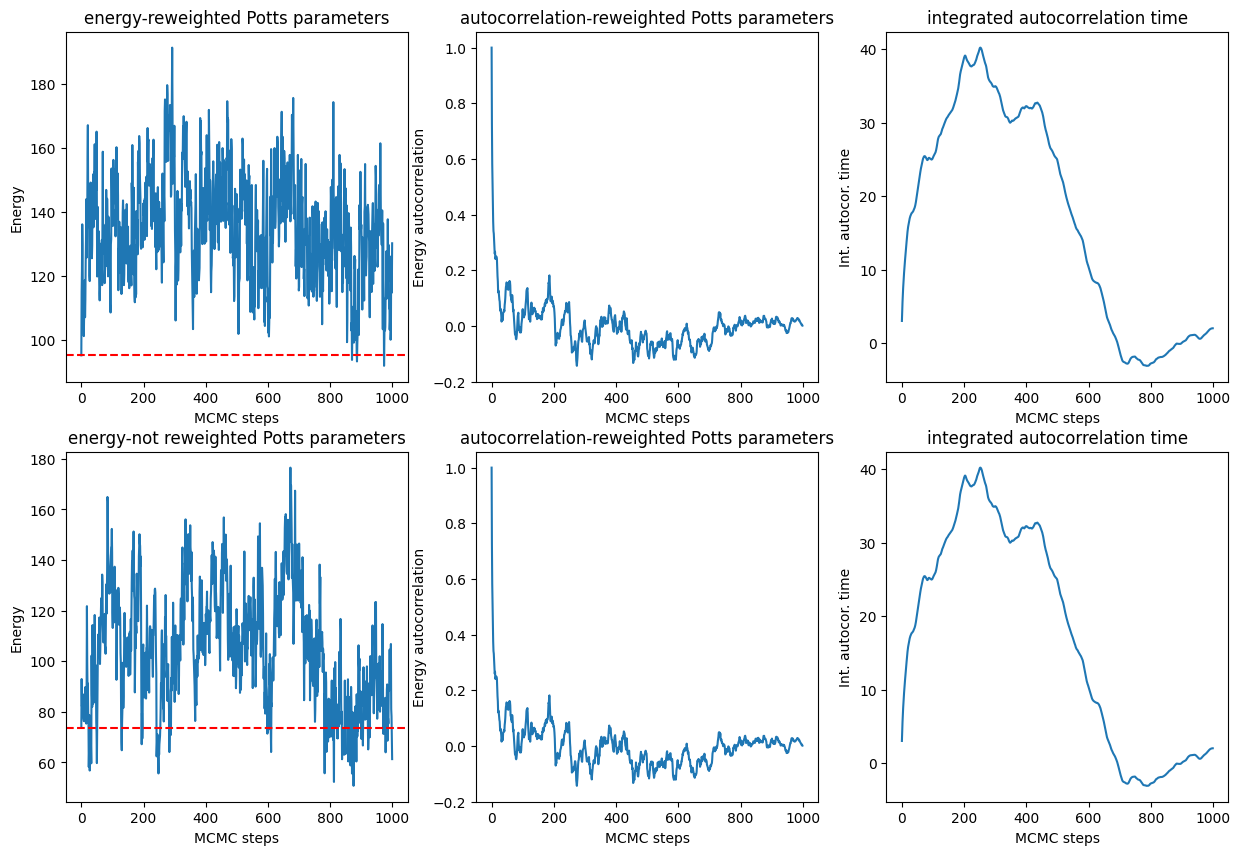

In [55]:
fig, ax = subplots(2,3,5)

ax[1,1].plot(energies_mcmc_reweight)
ax[1,1].axhline(energy_wt_reweight, color="red", linestyle="--")
ax[1,1].set_xlabel("MCMC steps")
ax[1,1].set_ylabel("Energy")
ax[1,1].set_title("energy-reweighted Potts parameters")

ax[1,2].plot(energy_autocor_reweight)
ax[1,2].set_xlabel("MCMC steps")    
ax[1,2].set_ylabel("Energy autocorrelation")
ax[1,2].set_title("autocorrelation-reweighted Potts parameters")

ax[1,3].plot(integrated_autocor_time_reweight)
ax[1,3].set_xlabel("MCMC steps")
ax[1,3].set_ylabel("Int. autocor. time")
ax[1,3].set_title("integrated autocorrelation time")

ax[2,1].plot(energies_mcmc_no_reweight)
ax[2,1].axhline(energy_wt_no_reweight, color="red", linestyle="--")
ax[2,1].set_xlabel("MCMC steps")
ax[2,1].set_ylabel("Energy")
ax[2,1].set_title("energy-not reweighted Potts parameters")

ax[2,2].plot(energy_autocor_reweight)
ax[2,2].set_xlabel("MCMC steps")    
ax[2,2].set_ylabel("Energy autocorrelation")
ax[2,2].set_title("autocorrelation-reweighted Potts parameters")

ax[2,3].plot(integrated_autocor_time_reweight)
ax[2,3].set_xlabel("MCMC steps")
ax[2,3].set_ylabel("Int. autocor. time")
ax[2,3].set_title("integrated autocorrelation time")
gcf()